In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('D:\dev\project\Football-Match-Prediction\data\processed\df_merged.csv')

In [6]:
data.columns

Index(['Time', 'Season', 'Round', 'HomeTeam_GF', 'HomeTeam_Result',
       'HomeTeam_Standard__SoT%_avg_last5', 'HomeTeam_GCA Types__TO_avg_last5',
       'HomeTeam_Standard__G/Sh_avg_last5',
       'HomeTeam_GCA Types__GCA_avg_last5',
       'HomeTeam_Challenges__Lost_avg_last5',
       'HomeTeam_Performance__Save%_avg_last5',
       'HomeTeam_GCA Types__Sh_avg_last5', 'HomeTeam_Standard__SoT_avg_last5',
       'HomeTeam_Performance__PSxG_avg_last5', 'HomeTeam_Clr_avg_last5',
       'HomeTeam_Performance__CS_avg_last5',
       'HomeTeam_Standard__G/SoT_avg_last5', 'HomeTeam_Err_avg_last5',
       'HomeTeam_GCA Types__PassLive_avg_last5', 'HomeTeam_CurrentPoints',
       'HomeTeam_LastSeasonPoints', 'HomeTeam', 'AwayTeam', 'AwayTeam_GF',
       'AwayTeam_Standard__SoT%_avg_last5', 'AwayTeam_GCA Types__TO_avg_last5',
       'AwayTeam_Standard__G/Sh_avg_last5',
       'AwayTeam_GCA Types__GCA_avg_last5',
       'AwayTeam_Challenges__Lost_avg_last5',
       'AwayTeam_Performance__Save%_av

In [7]:
# Ensure 'Time' is in datetime format
data['Time'] = pd.to_datetime(data['Time'])
# Split the data into training and validation sets
train = data[data['Season'] < 2023]
valid = data[data['Season'] >= 2023]
train = train.iloc[50:]

In [11]:
from sklearn.preprocessing import StandardScaler


y_train = train['HomeTeam_Result'].map({'W' : 2, 'D' : 1, 'L' : 0})
y_valid = valid['HomeTeam_Result'].map({'W' : 2, 'D' : 1, 'L' : 0})
X_train = train[['HomeTeam', 'AwayTeam']]
X_valid = valid[['HomeTeam', 'AwayTeam']]
# X_train = train.drop(columns=['Time', 'Season', 'HomeTeam_Result', 'HomeTeam_GF', 'AwayTeam_GF'])
# X_valid = valid.drop(columns=['Time', 'Season', 'HomeTeam_Result', 'HomeTeam_GF', 'AwayTeam_GF'])

In [12]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((2230, 2), (2230,), (480, 2), (480,))

In [13]:
X_valid.head()

,HomeTeam,AwayTeam
2280,Almeria,Rayo Vallecano
2281,Sevilla,Valencia
2282,Real Sociedad,Girona
2283,Las Palmas,Mallorca
2284,Athletic Club,Real Madrid


In [14]:
one_hot = True
if one_hot == True:
    # One-hot encode the team names
    X_train = pd.get_dummies(X_train, columns=['HomeTeam', 'AwayTeam'])
    X_valid = pd.get_dummies(X_valid, columns=['HomeTeam', 'AwayTeam'])
    # Align the columns of X_valid to match X_train
    X_valid = X_valid.reindex(columns=X_train.columns, fill_value=0)
else:
    # Label encode the team names
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    all_teams = pd.concat([X_train['HomeTeam'], X_train['AwayTeam'], X_valid['HomeTeam'], X_valid['AwayTeam']])
    le.fit(all_teams)
    X_train['HomeTeam'] = le.transform(X_train['HomeTeam'])
    X_train['AwayTeam'] = le.transform(X_train['AwayTeam'])
    X_valid['HomeTeam'] = le.transform(X_valid['HomeTeam'])
    X_valid['AwayTeam'] = le.transform(X_valid['AwayTeam'])
    

              precision    recall  f1-score   support

           0       0.48      0.47      0.48       133
           1       0.39      0.05      0.09       135
           2       0.54      0.84      0.66       212

    accuracy                           0.52       480
   macro avg       0.47      0.46      0.41       480
weighted avg       0.48      0.52      0.45       480



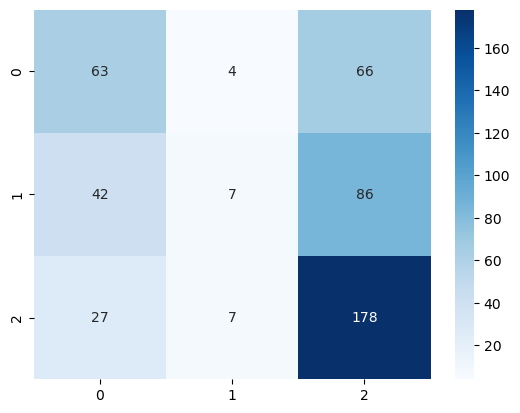

In [18]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# Initialize the model
nb_model = BernoulliNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = nb_model.predict(X_valid)

# Evaluate the model
sns.heatmap(confusion_matrix(y_valid, y_pred), annot=True, fmt='d', cmap='Blues')
print(classification_report(y_valid, y_pred))